A dataset was given which has 14 columns containing different information about a person. We need to predict the target column using other 13 columns. This is a supervised classification problem.



## Step 1: Importing the libraries and dataset

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
%matplotlib inline

In [110]:
#load the data set

df=pd.read_csv("./heart.csv")

df.head() #print the first 5 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [111]:
df.columns #get the columns labels


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**from the dataset description:**<br><br>
age<br>
sex = 1: male; 0: female<br>
cp = chest pain type<br>
trestbps = resting blood pressure (in mm Hg on admission to the hospital)<br>
chol = serum cholestoral in mg/dl<br>
fbs = fasting blood sugar > 120 mg/dl, 1: true; 0: false<br>
restecg = resting electrocardiographic results<br>
Value 0: normal<br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
thalach = maximum heart rate achieved<br>
exang = exercise induced angina, 1:yes; 0: no<br>
oldpeak = ST depression induced by exercise relative to rest<br>
slope = the slope of the peak exercise ST segment<br>
Value 1: upsloping<br>
Value 2: flat<br>
Value 3: downsloping<br>
ca = number of major vessels (0-3) colored by flourosopy<br>
thal= 0: normal; 1:fixed defect; 2:reversable defect<br>

## Step 2: Getting to know the dataset

In [112]:
#see the makup of the data

print(df.shape) # (rows , columns)

df.info #informations about df


(1025, 14)


<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [113]:
df.describe() #description of the data in df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [114]:
df.corr() #table of correlation


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [115]:
#check for duplicated values

df.duplicated().sum()


723

In [116]:
#Selects all rows in the DataFrame df that are duplicate rows

df.loc[df.duplicated(keep=False), :].head(10)#this will show the first 10 rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [117]:
#Will use age to sort by as it's more unique to each participant

df.sort_values(by='age', ascending=False)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
535,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [118]:
#Dropping the duplicate values and checking again

df.drop_duplicates(inplace=True)

df.duplicated().sum()


0

In [119]:
#Double check for null values

df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Step 3: Exploratory data analysis

### 1 - Age and sex

([<matplotlib.patches.Wedge at 0x7f7ae03ee5f0>,
 [Text(-0.8933695727708819, 1.387224137061914, 'Male'),
  Text(0.8933695727708822, -1.387224137061914, 'Female')],
 [Text(-0.4872924942386628, 0.7566677111246803, '68.2%'),
  Text(0.48729249423866294, -0.7566677111246802, '31.8%')])

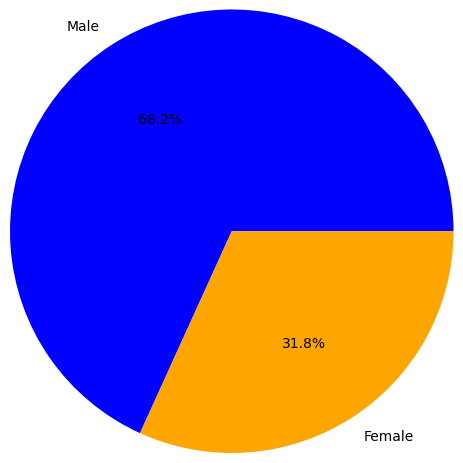

In [129]:
plt.pie(df['sex'].value_counts(),labels=['Male','Female'],colors=['blue','orange'],autopct='%1.1f%%',radius=1.5)


We can see that 30% of people were female and 70% were male.



<Axes: xlabel='age', ylabel='Count'>

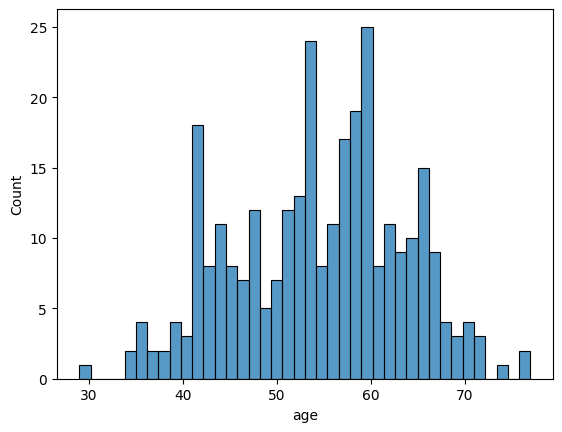

In [121]:
sns.histplot(df['age'],bins=40)


We can see that most of the people in this study had age 50-60.



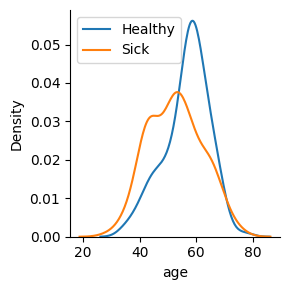

In [122]:
fig = sns.FacetGrid(df,hue="target")

fig.map(sns.kdeplot,'age')

plt.legend(labels=['Healthy','Sick'])

We can see that most of the people show their heart disease between age 40-60. Also, we see a peak of healthy people at 60. Let's see if age is a factor in heart disease:



/tmp/ipykernel_383707/1621263581.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=['Healthy','Sick'])


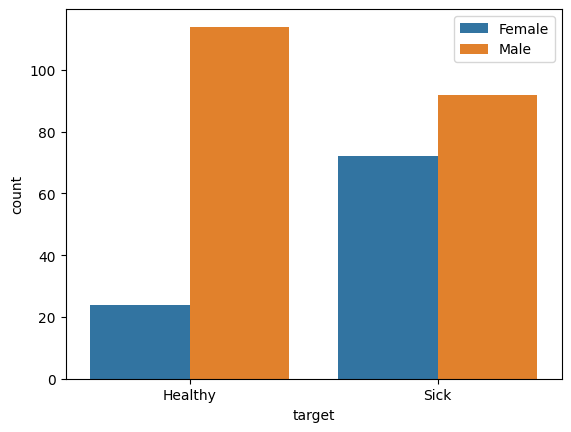

In [127]:
fig = sns.countplot(df,x='target',hue='sex')

fig.set_xticklabels(labels=['Healthy','Sick'])

plt.legend(['Female','Male'])

We can see that there are more man in this study, so both healthy and sick male are more than females.



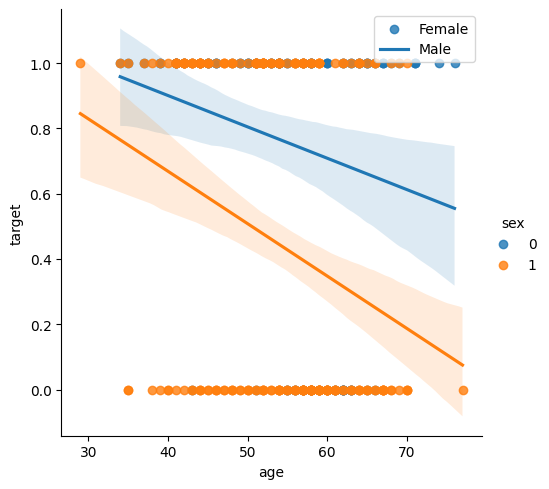

In [124]:
sns.lmplot(x='age',y='target',data=df,hue='sex')

plt.legend(['Female','Male'])

We can see that women tend to have more heart disease. Also, the more you get old, the less you have heart disease! (This sentence does not seem to be correct scientifically.)



###  2- Chest pain type


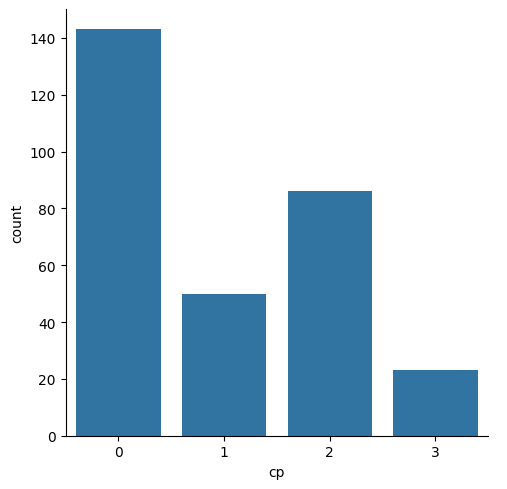

In [125]:
sns.catplot(x='cp',data=df,kind="count")


We can see the chest pain type 0 is more common between people.



/tmp/ipykernel_383707/3347584338.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=['pain type 0','pain type 1','pain type 2','pain type 3'])


[Text(0, 0, 'pain type 0'),
 Text(1, 0, 'pain type 1'),
 Text(2, 0, 'pain type 2'),
 Text(3, 0, 'pain type 3')]

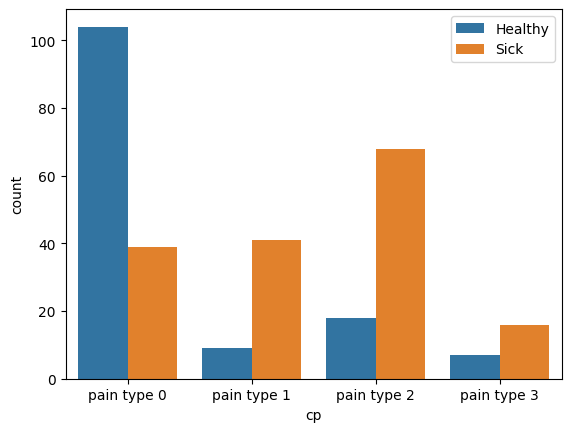

In [126]:
fig = sns.countplot(df,x='cp',hue='target')

plt.legend(['Healthy','Sick'])

fig.set_xticklabels(labels=['pain type 0','pain type 1','pain type 2','pain type 3'])

It seems that people with chest pain type 0 are less likely to have a serious problem. Chest pain type 2 seems more serious though.

### 3 - Blood pressure

"trestbps" is resting blood pressure (in mm Hg on admission to the hospital) : in thte dataset description

[Text(0.5, 0, 'resting blood pressure')]

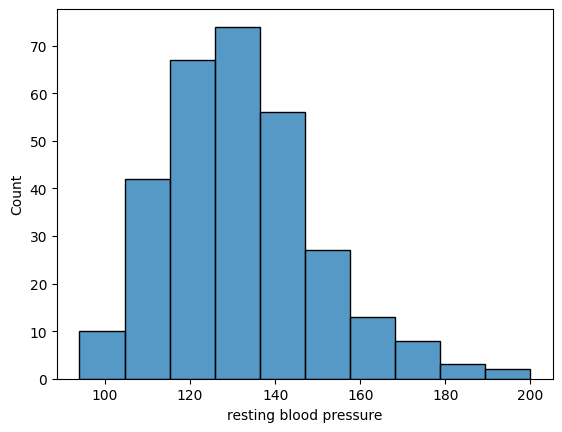

In [61]:
fig = sns.histplot(df['trestbps'],bins= 10)

fig.set(xlabel='resting blood pressure')

The blood pressure of the poeple in this study is between 120-130. Let's see if this is related to their health condition:



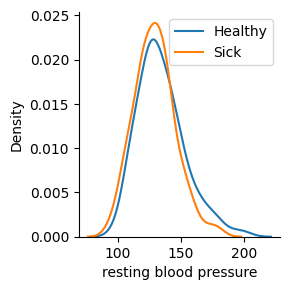

In [79]:
fig = sns.FacetGrid(df,hue="target")

fig.map(sns.kdeplot,'trestbps')

plt.legend(labels=['Healthy','Sick'])

fig.set(xlabel='resting blood pressure')

It seems that people with heart problems generally had slighly lower blood pressure than normal people.



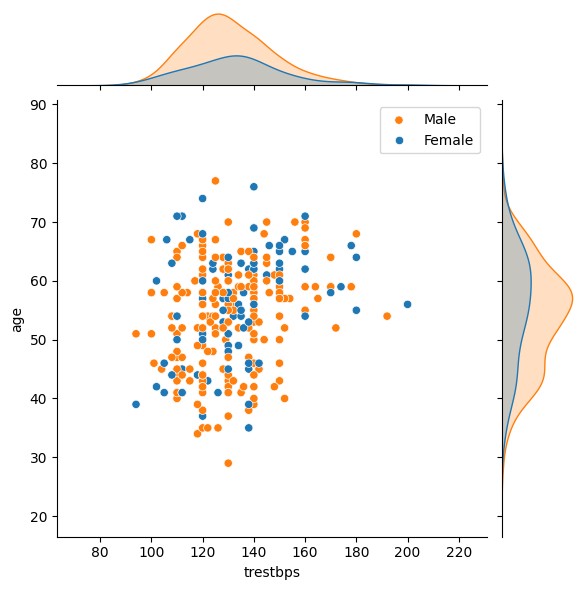

In [128]:
sns.jointplot(df,x='trestbps',y='age',hue='sex')

plt.legend(labels=['Male','Female'])

In both women and men we can see that blood pressure increases with age.



### 4 - cholestoral

chol or cholestoral in mg/dl is measured in all people

[Text(0.5, 0, 'serum cholestrol')]

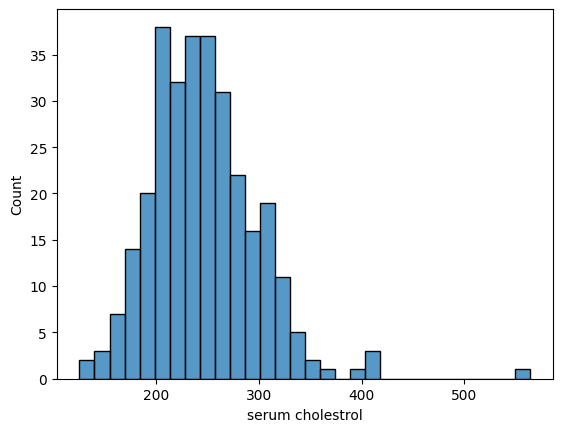

In [81]:
fig = sns.histplot(df['chol'],bins= 30)

fig.set(xlabel='serum cholestrol')

Cholestrol is between 200-300 in this study.

### 4 - Fasting blood sugar

fbs or fasting blood sugar should be less than 120 mg/dl. 1: true; 0: false (dataset desciption)



/tmp/ipykernel_383707/1562523863.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=['low blood sugar','high blood sugar'])


[Text(0, 0, 'low blood sugar'), Text(1, 0, 'high blood sugar')]

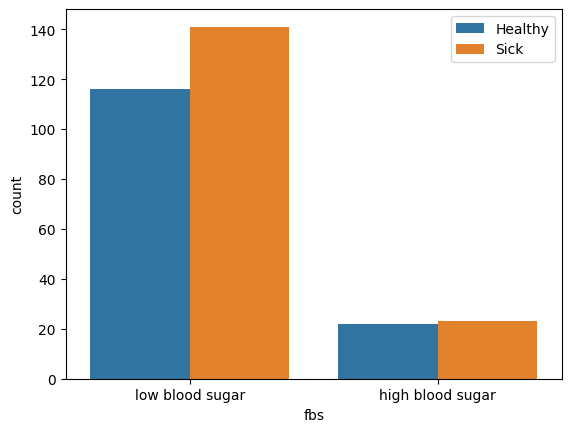

In [85]:
fig = sns.countplot(df,x='fbs', hue = 'target')

plt.legend(['Healthy','Sick'])

fig.set_xticklabels(labels=['low blood sugar','high blood sugar'])


We see that most of the healthy and sick people have blood sugar less than 120. Few people have higher blood sugar, but it may not be the reason they are sick.



### 5 - Resting electrocardiographic results

Resting electrocardiographic results can have 0,1 and 2 value:

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
(dataset desciption)



/tmp/ipykernel_383707/2178393462.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=['value 0','value 1','value 2'])


[Text(0, 0, 'value 0'), Text(1, 0, 'value 1'), Text(2, 0, 'value 2')]

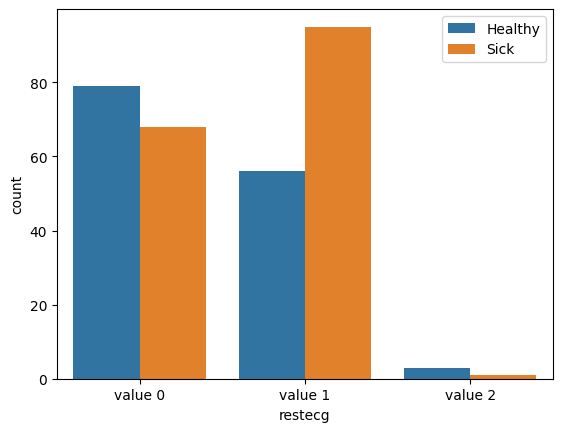

In [90]:
fig = sns.countplot(df,x='restecg',hue='target')

plt.legend(['Healthy','Sick'])

fig.set_xticklabels(labels=['value 0','value 1','value 2'])

It seems that value 2 is kind of rare result. Also, value 1 seems to be more dangerous as a lot of sick people have that.



### 6 - Maximum heart rate achieved

thalach or maximum heart rate achieved histogram is below:



[Text(0.5, 0, 'maximum heart rate achieved')]

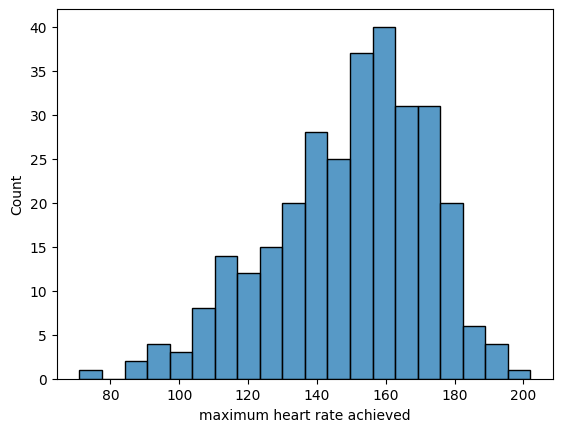

In [108]:
fig = sns.histplot(df['thalach'],bins=20)
fig.set(xlabel='maximum heart rate achieved')

The maximum heart rate achieved seems to be between 150 - 170.

/tmp/ipykernel_383707/4018317226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.stripplot(df,x='target',y='thalach',palette='winter')
/tmp/ipykernel_383707/4018317226.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=[ 'healthy','sick'])


[Text(0, 0, 'healthy'), Text(1, 0, 'sick')]

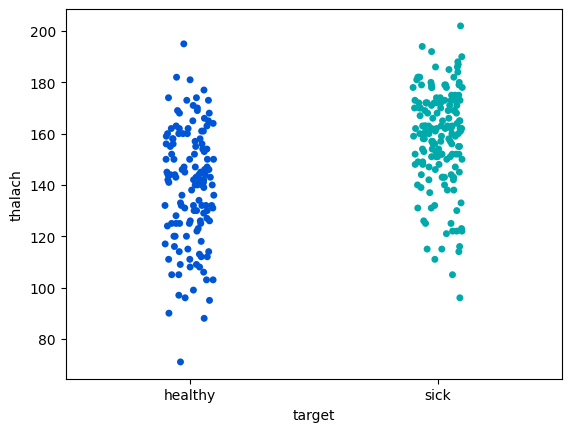

In [137]:
fig = sns.stripplot(df,x='target',y='thalach',palette='winter')

fig.set_xticklabels(labels=[ 'healthy','sick'])

Sick people seem to have higher maximum heart rate values.



### 7 - Exercise induced angina

/tmp/ipykernel_383707/3630013683.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=['no angina','with angina'])


[Text(0, 0, 'no angina'), Text(1, 0, 'with angina')]

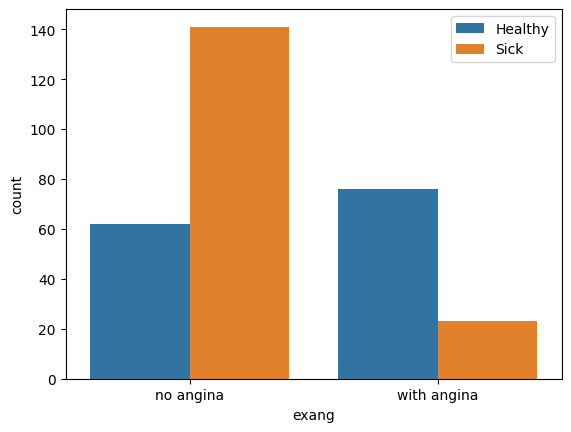

In [100]:
fig = sns.countplot(df,x='exang',hue='target')

plt.legend(['Healthy','Sick'])

fig.set_xticklabels(labels=['no angina','with angina'])

We can see that many healthy people have exercise induced angina, while many sick people do not have it. So this might not be a sign of heart disease

### 8- Oldpeak (ST depression)

ST depression refers to a finding on an electrocardiogram (datatset description)

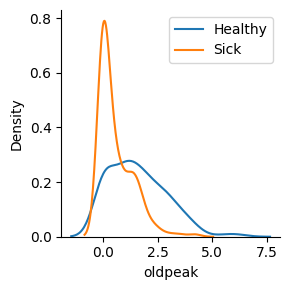

In [103]:
fig = sns.FacetGrid(df,hue="target")

fig.map(sns.kdeplot,'oldpeak')

plt.legend(labels=['Healthy','Sick'])

We can clearly see that in sick people we have a pick around 0. This can be a good indicator for this heart disease.



### 9 - Slope of the peak exercise ST segment

The slope of the peak exercise ST segment can have 3 values:

Value 1: upsloping, Value 2: flat, Value 3: downsloping



/tmp/ipykernel_383707/429564343.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(labels=['value 1','value 2','value 3'])


[Text(0, 0, 'value 1'), Text(1, 0, 'value 2'), Text(2, 0, 'value 3')]

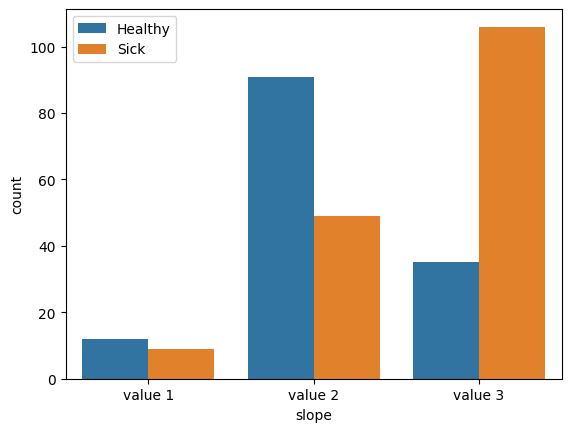

In [105]:
fig = sns.countplot(df,x='slope',hue='target')

plt.legend(['Healthy','Sick'])

fig.set_xticklabels(labels=['value 1','value 2','value 3'])


## Step 4 : Corrolations

Now that we analyzed all the factors, let's see if the corrolation heatmap gives us

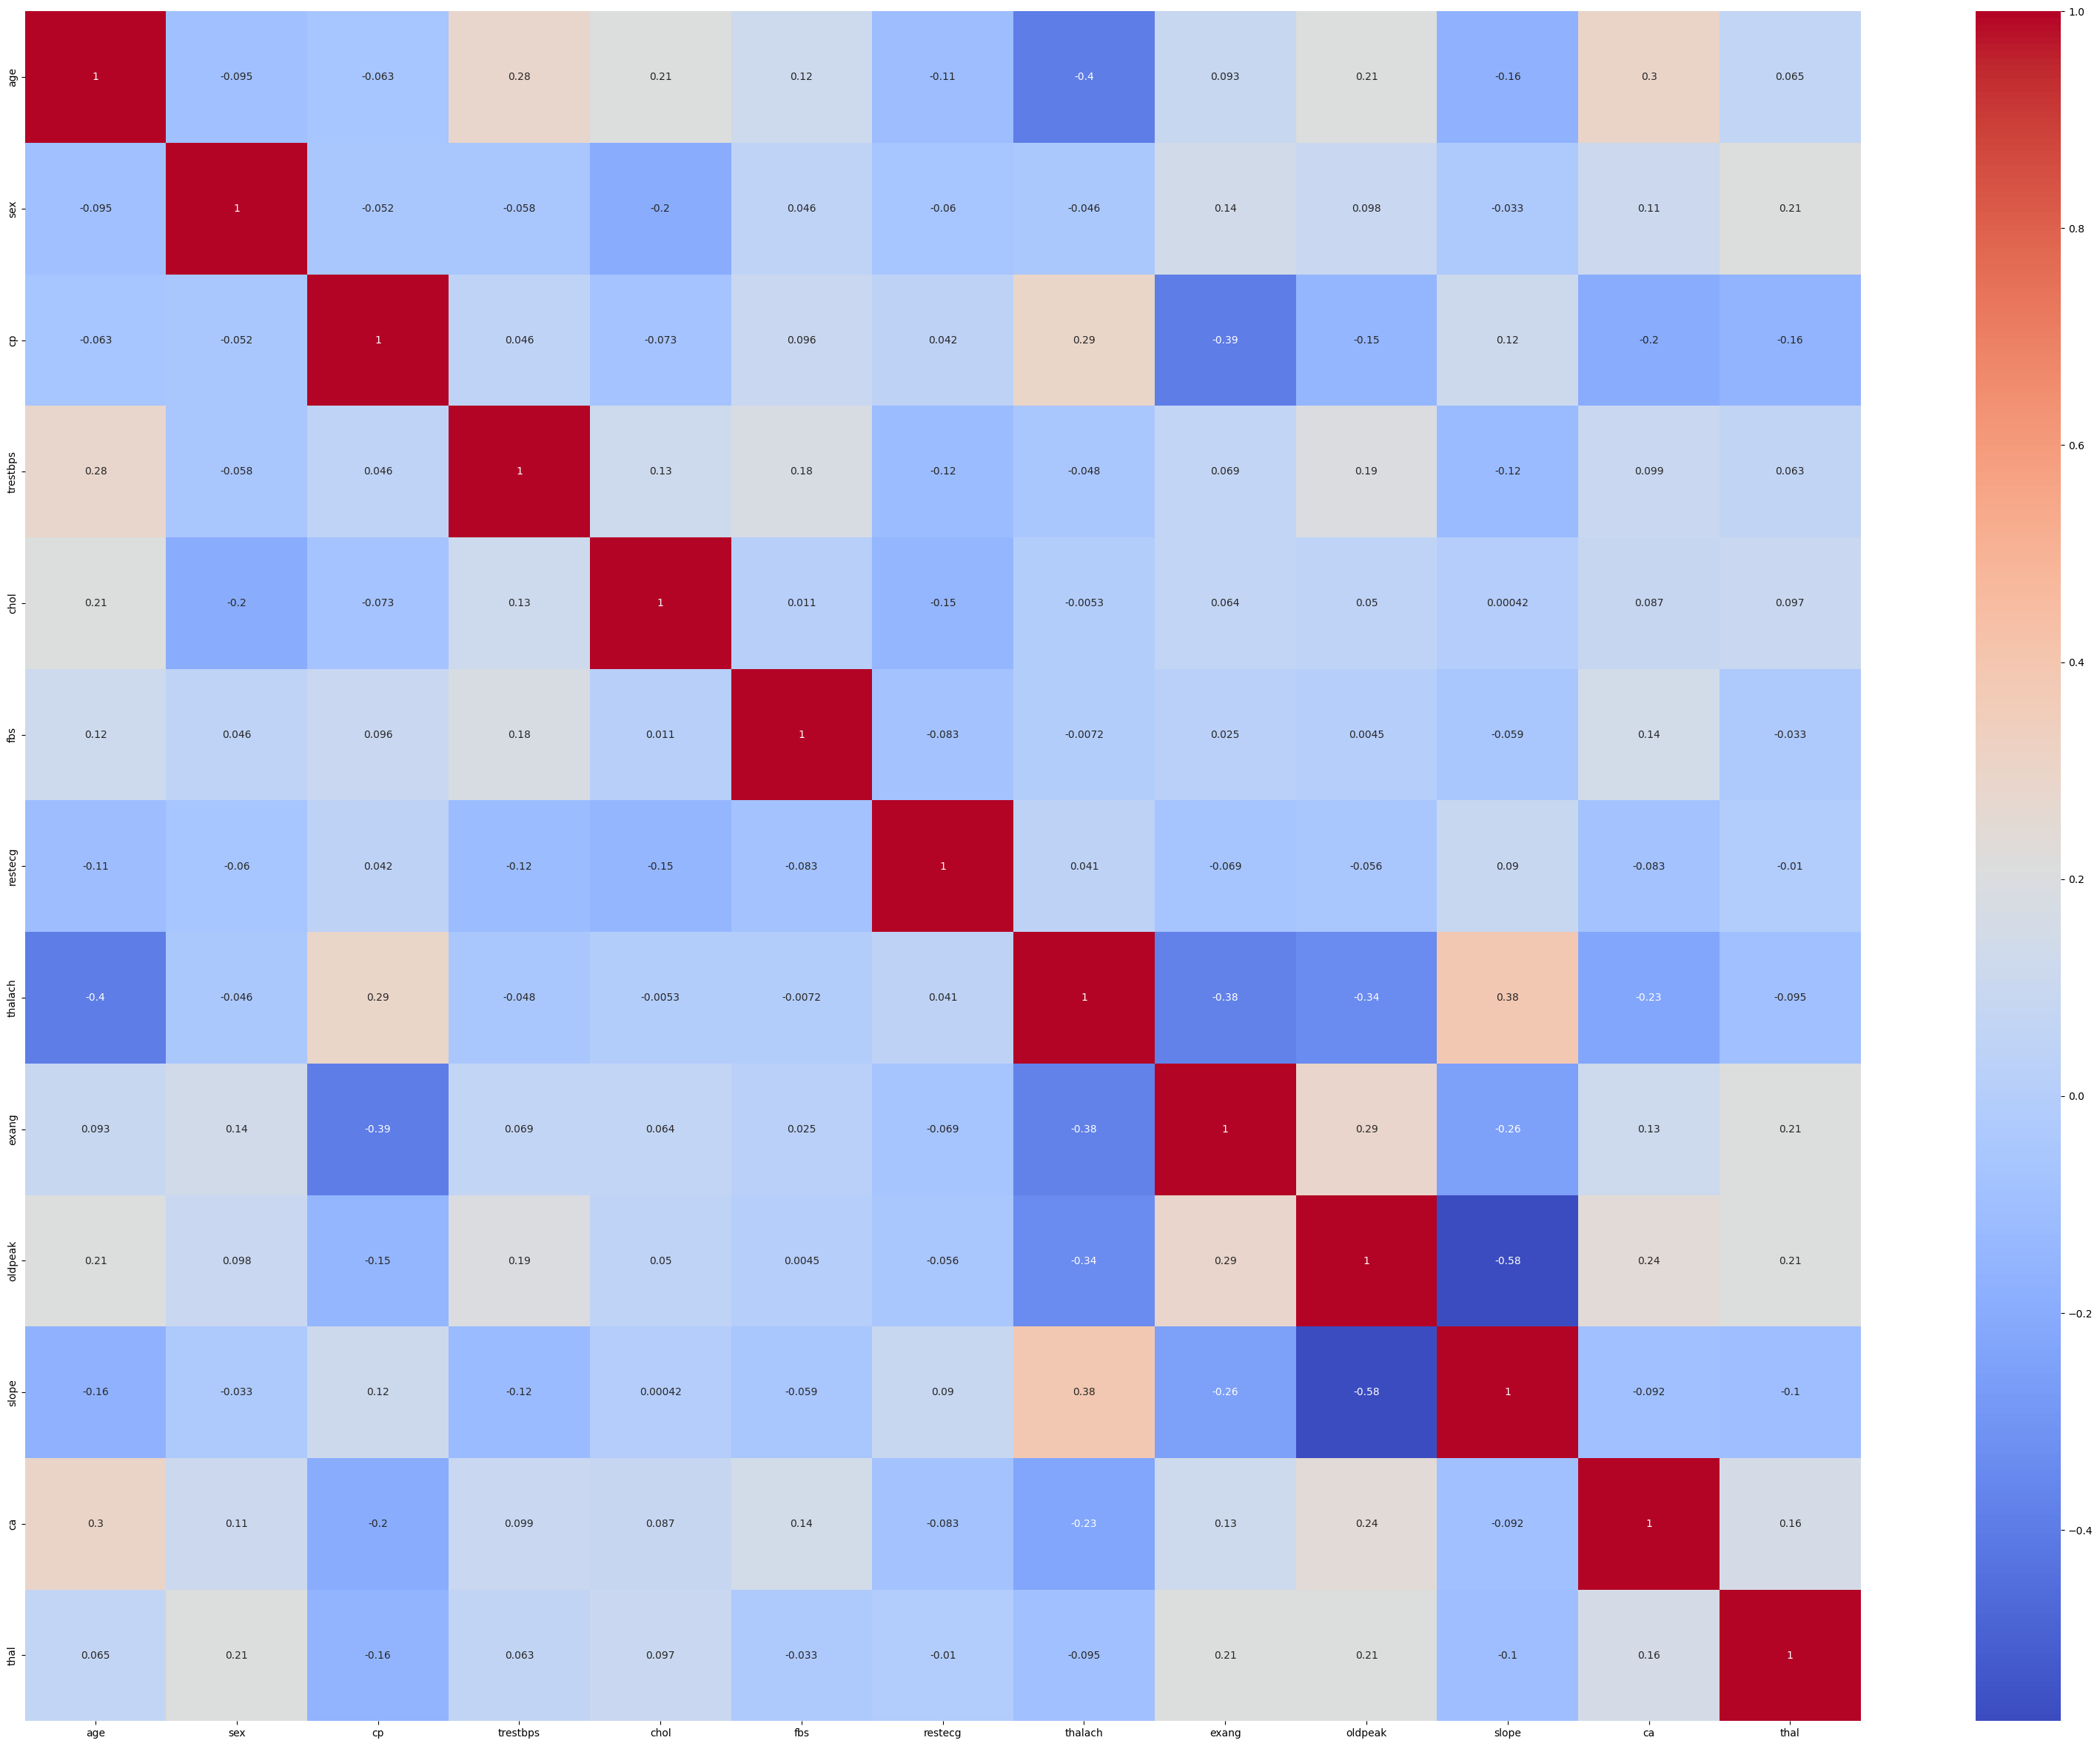

In [138]:
x=df.drop("target",axis=1)

correlation_matrix = x.corr()

plt.figure(figsize=(40,30))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

It is obvious that chest pain (cp), maximum heart rate achieved (thalach) and slope have a possitive corrolation with target, while exercise induced angina (exang), oldpeak, number of major vessels colored by flourosopy (ca) and thalasemia (thal) have a negative corrolation